In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_NE_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,NaN,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,NaN,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	4
float64		column 3	4
float64		column 4	4
float64		column 5	4
float64		column 6	4
float64		column 7	0
float64		column 8	0
float64		column 9	0
float64		column 10	8
float64		column 11	0
float64		column 12	4
float64		column 13	4
float64		column 14	0
float64		column 15	4
float64		column 16	0
float64		column 17	0
float64		column 18	0
float64		column 19	0
float64		column 20	0
float64		column 21	0
float64		column 22	0
float64		column 23	0
float64		column 30	0
float64		column 25	0
float64		column 26	0
float64		column 27	4
float64		column 28	4
float64		column 29	4
float64		column 30	0
float64		column 31	4
float64		column 32	4
float64		column 33	4
float64		column 34	0
float64		column 35	0
float64		column 36	0
float64		column 37	4
float64		column 38	0
float64		column 39	0
float64		column 40	4
float64		column 41	4
float64		column 42	0
float64		column 43	4
float64		column 44	4
float64		column 45	0
float64		column 46	4
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,208.000000,208.000000,208.000000,200.000000,...,208.000000,208.000000,204.000000,208.000000,208.000000,204.000000,208.000000,208.000000,204.000000,208.000000
mean,0.028856,0.037817,0.044270,0.053765,0.074002,0.103815,0.121747,0.134799,0.178003,0.206938,...,0.016069,0.013420,0.010744,0.010941,0.009290,0.008277,0.007820,0.007949,0.007832,0.006507
std,0.022017,0.032311,0.038663,0.046473,0.050924,0.058876,0.061788,0.085152,0.118387,0.130085,...,0.012008,0.009634,0.007086,0.007301,0.007088,0.005755,0.005785,0.006470,0.006040,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.019075,0.024475,0.038475,0.067025,0.080900,0.080425,0.097025,0.113800,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004475,0.003700,0.003600,0.003675,0.003100
50%,0.022850,0.030400,0.034650,0.044050,0.062500,0.091350,0.106950,0.112100,0.152250,0.184250,...,0.013900,0.011400,0.009650,0.009300,0.007500,0.006950,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047725,0.058825,0.062850,0.100275,0.132425,0.154000,0.169600,0.233425,0.267500,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.009925,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.322500,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

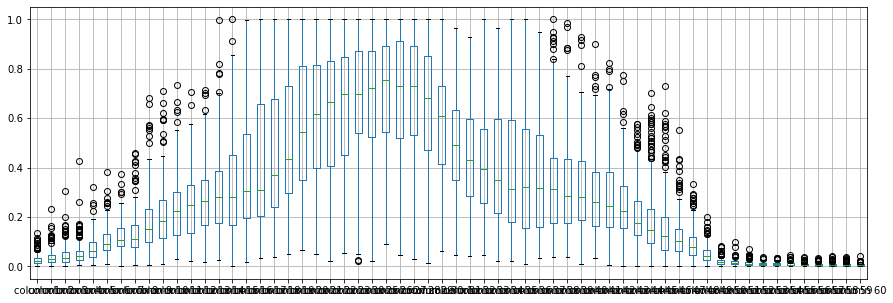

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.028856
column 2       0.037817
column 3       0.044270
column 4       0.053765
column 5       0.074002
column 6       0.103815
column 7       0.121747
column 8       0.134799
column 9       0.178003
column 10      0.206938
column 11      0.236013
column 12      0.250060
column 13      0.274161
column 14      0.296568
column 15      0.318475
column 16      0.378487
column 17      0.415983
column 18      0.452318
column 19      0.504812
column 20      0.563047
column 21      0.609060
column 22      0.624275
column 23      0.646975
column 30      0.672654
column 25      0.675424
column 26      0.699866
column 27      0.699164
column 28      0.690052
column 29      0.648114
column 30.1    0.580350
column 31      0.504572
column 32      0.441934
column 33      0.418518
column 34      0.403233
column 35      0.392571
column 36      0.384848
column 37      0.368509
column 38      0.339657
column 39      0.325800
column 40      0.312959
column 41      0.287433
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.676119,0.507433,0.401506,0.245288,0.224114,0.246862,0.406942,0.367718,0.319592,...,0.263683,0.320927,0.312815,0.322074,0.299185,0.252683,0.314217,0.366390,0.325594,0.293925
column 2,0.676119,1.000000,0.789583,0.605459,0.291384,0.339605,0.251059,0.302750,0.299103,0.250554,...,0.329594,0.442144,0.360015,0.355146,0.376812,0.283280,0.310404,0.356086,0.364043,0.364628
column 3,0.507433,0.789583,1.000000,0.784416,0.443146,0.356847,0.190397,0.239758,0.254784,0.226613,...,0.236376,0.401621,0.346773,0.364200,0.289880,0.281867,0.382685,0.336173,0.419446,0.372883
column 4,0.401506,0.605459,0.784416,1.000000,0.658521,0.357669,0.254472,0.243642,0.259140,0.247564,...,0.175650,0.364197,0.357009,0.337542,0.259510,0.266745,0.336417,0.340459,0.406670,0.393693
column 5,0.245288,0.291384,0.443146,0.658521,1.000000,0.613305,0.337587,0.270709,0.183935,0.189932,...,0.118558,0.215679,0.290901,0.209566,0.178104,0.243513,0.229430,0.236594,0.233164,0.182857
column 6,0.224114,0.339605,0.356847,0.357669,0.613305,1.000000,0.701239,0.473578,0.335090,0.296764,...,0.169583,0.259263,0.153513,0.170563,0.137728,0.163622,0.171678,0.208368,0.228020,0.175525
column 7,0.246862,0.251059,0.190397,0.254472,0.337587,0.701239,1.000000,0.675774,0.470580,0.399752,...,0.184152,0.144051,0.039242,0.163074,0.195541,0.164587,0.186324,0.242646,0.170222,0.222493
column 8,0.406942,0.302750,0.239758,0.243642,0.270709,0.473578,0.675774,1.000000,0.778577,0.616698,...,0.260692,0.219038,0.109651,0.234008,0.239551,0.272878,0.267212,0.287603,0.204739,0.146216
column 9,0.367718,0.299103,0.254784,0.259140,0.183935,0.335090,0.470580,0.778577,1.000000,0.868043,...,0.174873,0.207996,0.111421,0.202615,0.179342,0.228224,0.193963,0.231745,0.098441,0.095243
column 10,0.319592,0.250554,0.226613,0.247564,0.189932,0.296764,0.399752,0.616698,0.868043,1.000000,...,0.184731,0.128781,0.128865,0.167284,0.176289,0.128892,0.149742,0.196301,0.031342,0.072707


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+28,60+28+28,60+28+28+28,60+28+28,60+28,60], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.787364666278545
Epoch: 1 , loss: 18.526304978590744
Epoch: 2 , loss: 18.397325075589695
Epoch: 3 , loss: 18.2997009570782
Epoch: 4 , loss: 18.231263380784256
Epoch: 5 , loss: 18.139638607318584
Epoch: 6 , loss: 17.9937010544997
Epoch: 7 , loss: 17.87500308110164
Epoch: 8 , loss: 17.78395153925969
Epoch: 9 , loss: 17.625133514404297
Epoch: 10 , loss: 17.426785248976486
Epoch: 11 , loss: 17.141742706298828
Epoch: 12 , loss: 16.75740777529203
Epoch: 13 , loss: 16.169427431546726
Epoch: 14 , loss: 15.23750297839825
Epoch: 15 , loss: 13.846506338853102
Epoch: 16 , loss: 12.46364608177772
Epoch: 17 , loss: 11.434108147254356
Epoch: 18 , loss: 10.805538104130672
Epoch: 19 , loss: 10.4058591402494
Epoch: 20 , loss: 10.03542474599985
Epoch: 21 , loss: 9.879023772019606
Epoch: 22 , loss: 9.617962837219238
Epoch: 23 , loss: 9.700733331533579
Epoch: 24 , loss: 9.421414448664738
Epoch: 25 , loss: 9.4684828978318

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.0664
column 2       0.0575
column 3       0.0842
column 4       0.0372
column 5       0.0458
column 6       0.0771
column 7       0.0771
column 8       0.1130
column 9       0.2353
column 10      0.1838
column 11      0.2869
column 12      0.4129
column 13      0.3647
column 14      0.1984
column 15      0.2840
column 16      0.4039
column 17      0.5837
column 18      0.6792
column 19      0.6086
column 20      0.4858
column 21      0.3246
column 22      0.2013
column 23      0.2082
column 30      0.1686
column 25      0.2484
column 26      0.2736
column 27      0.2984
column 28      0.4655
column 29      0.6990
column 30.1    0.7474
column 31      0.7956
column 32      0.7981
column 33      0.6715
column 34      0.6942
column 35      0.7440
column 36      0.8169
column 37      0.8912
column 38      1.0000
column 39      0.8753
column 40      0.7061
column 41      0.6803
column 42      0.5898
column 43      0.4618
column 44      0.3639
column 45      0.1492
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00861,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.0,0.0,-0.060653,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

2.333948679066513

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.05237643470881916

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.098600,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.00650,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.258300,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.00890,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.228000,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.01660,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.036800,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.00360,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.064900,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.01401,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.102347,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.00980,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.095800,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.00930,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.117100,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.00290,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.135400,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.00460,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_NE_1(imp).xlsx", index=False, header=False)